# Imports

In [2]:
import sys
sys.path.append('../../')

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from datasets.nsd.nsd import NaturalScenesDataset
from datasets.nsd.nsd_clip import NSDCLIPFeaturesDataset
from methods.high_level_attributes.shift_vectors import *
from methods.img_utils import image_grid_as_image

# Load data

In [3]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

subject = 1
data_root = '../../data/NSD'
roi = ["PPA"]
hemisphere = 'right'
clip_extractor_type = "clip_2_0"

nsd = NaturalScenesDataset(
    root=data_root,
    subject=subject,
    partition="train",
    hemisphere=hemisphere,
    roi=roi,
)

dataset = NSDCLIPFeaturesDataset(
    nsd=nsd,
    clip_extractor_type=clip_extractor_type,
    predict_average=True,
)
del nsd

# Analyses

### Visualize activations shift vector

In [4]:
shift_vector = compute_for_activations(dataset.targets, dataset.features)[:,0]
order, sims = order_by_shift_vector(shift_vector, dataset.features, return_sims=True)

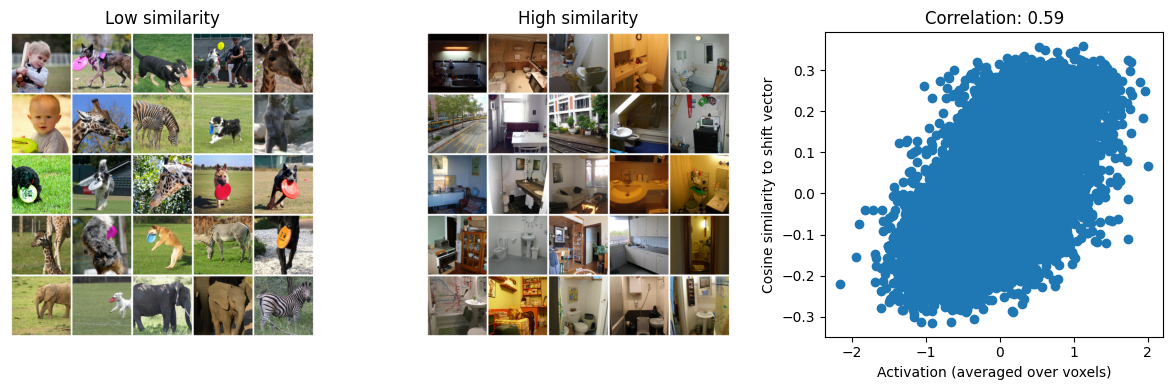

In [5]:
images_low = order[:25]
images_low = [Image.open(os.path.join(data_root, dataset.nsd.df.iloc[i]["filename"])) for i in images_low]
images_high = order[-25:]
images_high = [Image.open(os.path.join(data_root, dataset.nsd.df.iloc[i]["filename"])) for i in images_high]

f, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image_grid_as_image(images_low, 5, 5))
axes[0].axis("off")
axes[0].set_title("Low similarity")
axes[1].imshow(image_grid_as_image(images_high, 5, 5))
axes[1].axis("off")
axes[1].set_title("High similarity")
axes[2].scatter(dataset.targets, sims)
axes[2].set_xlabel("Activation (averaged over voxels)")
axes[2].set_ylabel("Cosine similarity to shift vector")
axes[2].set_title(f"Correlation: {np.corrcoef(dataset.targets, sims)[0,1]:.2f}")
plt.tight_layout()
plt.show()

### Cosine similarity with high level attributes

In [6]:
# TODO

### Correlation of high level attributes with voxel activations

In [7]:
# TODO